In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(style="darkgrid")
from sklearn.metrics import confusion_matrix
#from sklearn.metrics.classification import log_loss
from datetime import datetime as dt
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset.
data=pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Get percentage fradulent information
not_fraud=data[data['Class']==0].shape[0]
fraud=data[data['Class']==1].shape[0]
total=fraud+not_fraud

print("Percentage of Fradulent transaction: {}".format(np.round(100*fraud/total,4)))
print("Percentage of Non Fradulent transaction: {}".format(np.round(100*not_fraud/total,4)))

Percentage of Fradulent transaction: 0.1727
Percentage of Non Fradulent transaction: 99.8273


In [4]:
state=48

In [5]:
#Number of data_fraudulent transaction in the whole data
data_fraud=data[data['Class']==1]
data_valid=data[data['Class']==0].sample(data_fraud.shape[0],random_state=state)
data_under=pd.concat([data_fraud,data_valid])

#We will shuffle our dataset after concatenating
data_under = data_under.sample(frac=1).reset_index(drop=True)
data_under.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,40674.0,-0.692841,0.166683,1.352646,0.448964,1.288304,-0.926343,0.581101,-0.369026,-0.477145,...,0.017163,0.210360,-0.260939,-0.019834,0.168770,0.610043,-0.120511,-0.106382,0.00,0
1,148028.0,-1.053840,4.362801,-6.023534,5.304534,1.480738,-2.193821,-1.530817,0.626857,-4.037021,...,0.397954,-0.945402,-0.376138,-0.220480,0.264003,0.048935,0.847220,0.531932,0.00,1
2,130526.0,1.975724,0.088492,-1.634876,1.433433,0.295373,-1.245612,0.652176,-0.413525,0.307630,...,0.055429,0.276986,-0.026516,0.033836,0.436135,-0.496096,-0.028441,-0.057444,40.00,0
3,165407.0,2.055144,0.112776,-1.704561,0.435002,0.368601,-0.902507,0.181524,-0.227022,0.527983,...,-0.359854,-0.963576,0.338848,0.561803,-0.274093,0.169499,-0.065966,-0.029082,10.77,0
4,138942.0,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,...,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,727.91,1


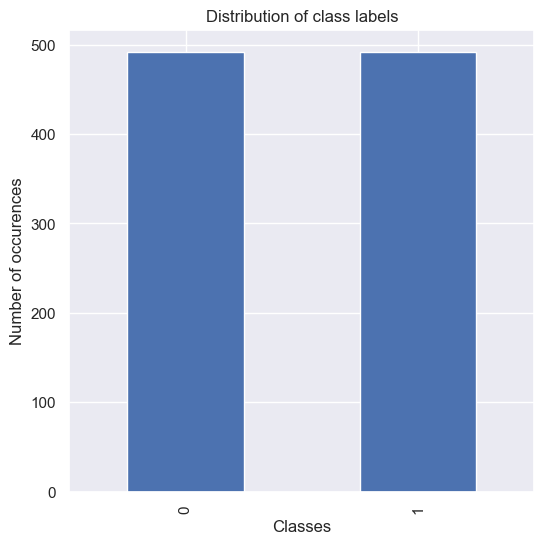

In [6]:
#Check the class distribution in the given data
data_under['Class'].value_counts().plot(figsize=(6,6),kind='bar')
plt.title("Distribution of class labels")
plt.xlabel("Classes")
plt.ylabel("Number of occurences")
plt.show()

In [7]:
#Get percentage fradulent information in the balanced dataset
not_fraud=data_under[data_under['Class']==0].shape[0]
fraud=data_under[data_under['Class']==1].shape[0]
total=fraud+not_fraud

print("Percentage of Fradulent transaction: {}".format(np.round(100*fraud/total,4)))
print("Percentage of Non Fradulent transaction: {}".format(np.round(100*not_fraud/total,4)))

Percentage of Fradulent transaction: 50.0
Percentage of Non Fradulent transaction: 50.0


In [8]:
from sklearn.model_selection import train_test_split

X=data_under.drop("Class", axis=1)
y=data_under['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=state)

print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])

Number of data points in train data: 787
Number of data points in test data: 197


In [9]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
   # cmap=sn.light_palette("black")
    plt.subplot(1, 3, 1)
    sn.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sn.heatmap(B, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sn.heatmap(A, annot=True,  fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [37]:
#This function is used to plot the ROC curve on both train and test.
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plot_roc_curve(classifier, X_train, y_train, X_test, y_test):
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    '''TEST DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    fpr["Test"], tpr["Test"], threshold = roc_curve(y_test, y_probs)
    roc_auc["Test"] = auc(fpr["Test"], tpr["Test"])
    
    plt.figure(figsize=(15,10))
    linewidth = 2
    plt.plot(fpr["Test"], tpr["Test"], color='green', lw=linewidth, label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"])
  
    plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--', label='Baseline ROC curve (area = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [38]:
def model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels):
    
    #To store results at various phases during training as well as cross validation stages
    results = dict()
    model = rsearch_cv.best_estimator_
    
    #Time at which model starts training 
    train_start_time = dt.now()
    print('Training the model...')
    model.fit(X_train, y_train)
    print('Training completed... \n \n')
    train_end_time = dt.now()
    results['Training_Time'] =  train_end_time - train_start_time
    print('Training Time (HH:MM:SS.ms) -- {}\n\n'.format(results['Training_Time']))
    
    
    #Predict the test data
    print('Predicting test data...')
    test_start_time = dt.now()
    y_pred = model.predict(X_test)
    test_end_time = dt.now()
    print('Predicting test data completed... \n \n')
    results['Testing_Time'] = test_end_time - test_start_time
    print('Testing Time(HH:MM:SS:ms) -- {}\n\n'.format(results['Testing_Time']))
    results['Predicted'] = y_pred
   

    #Compute the F1 score 
    f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') #F1 = 2 * (precision * recall) / (precision + recall)
    
    #Store F1 Score in results
    results['F1_Score'] = f1_score
    
    print('F1 Score: ')
  
    print('\n    {}\n\n'.format(f1_score))      
    

    #Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Accuracy'] = accuracy
    print('Accuracy: ')
    
    print('\n    {}\n\n'.format(accuracy))
    
    #Calculate overall recall_score of the model
    recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Recall'] = recall
    
    print('Recall: ')
   
    print('\n    {}\n\n'.format(recall))
    
    #Calculate overall roc-auc of the model
    #Calibrate the model
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    class_probabilities = sig_clf.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    roc_auc = metrics.roc_auc_score(y_true=y_test, y_score=y_probs)
        
    #Store the ROC-AUC in results
    results['ROC-AUC'] = roc_auc
   
    print('ROC AUC: ')
   
    print('\n    {}\n\n'.format(roc_auc))   
                   
    #Display the classification report having individual class recalls and precision values.
    
    print('Classifiction Report:')
   
    classification_report = metrics.classification_report(y_test, y_pred)
    
    #Store report in results
    results['Classification_Report'] = classification_report
    print(classification_report)
    
    #Add the trained  model to the results
    results['Model'] = model
    
    #Plot the confusion matrix curve
    plot_confusion_matrix(y_test, y_pred)
    
    return results, model

In [39]:
def print_grid_search_attributes(model):
    #Estimator that gave highest score among all the estimators formed in GridSearch
    
    print('Best Estimator: ')
   
    print('\n\t{}\n'.format(model.best_estimator_))

    #Parameters that gave best results while performing grid search
   
    print('Best parameters: ')
    
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))

    #Number of cross validation splits
   
    print('No of CrossValidation sets: ')
   
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))

    #Average cross validated score of the best estimator, from the Grid Search 
   
    print('Best Score: ')
   
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

Logistic Regression

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from datetime import datetime as dt

st=dt.now()

tuned_parameters = {'C': np.logspace(-4,3,50),
                     'penalty': ['l1','l2'] } #C values used for cross validation

model = LogisticRegression(n_jobs=-1, random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Time taken to complete random search:  0:00:00.348579


In [41]:
print_grid_search_attributes(rsearch_cv)

Best Estimator: 

	LogisticRegression(C=1.389495494373136, n_jobs=-1, random_state=48)

Best parameters: 
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 1.389495494373136}

No of CrossValidation sets: 

	Total numbre of cross validation sets: 3

Best Score: 

	Average Cross Validate scores of best estimator : 

	0.977264928287596



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.025603


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.003604


F1 Score: 

    0.9086294416243654


Accuracy: 

    0.9086294416243654


Recall: 

    0.8469387755102041


ROC AUC: 

    0.950628736343022


Classifiction Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        99
           1       0.97      0.85      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



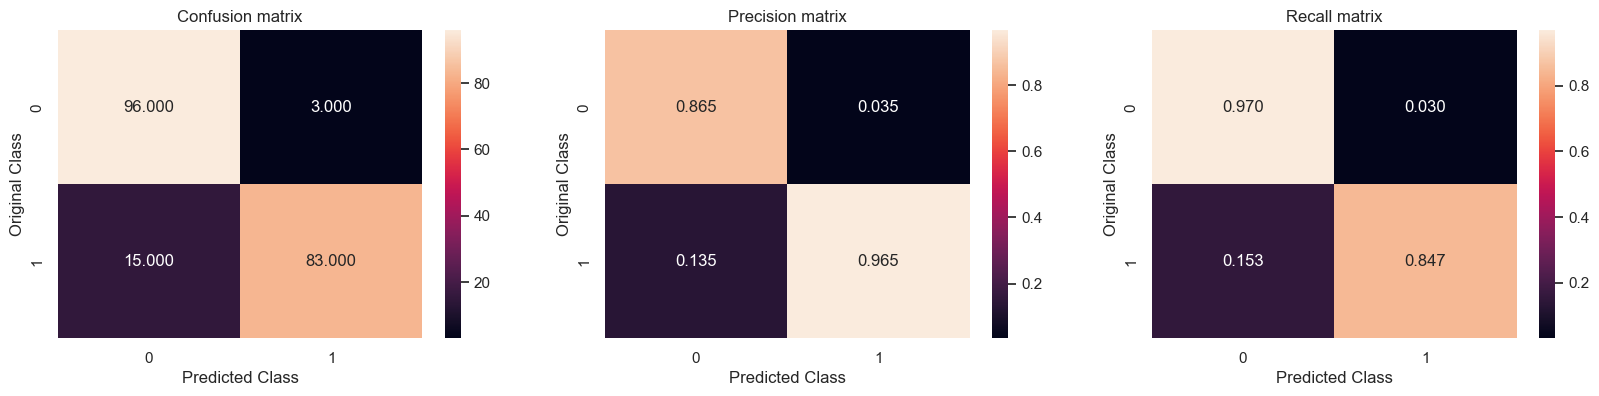

In [42]:
log_reg_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

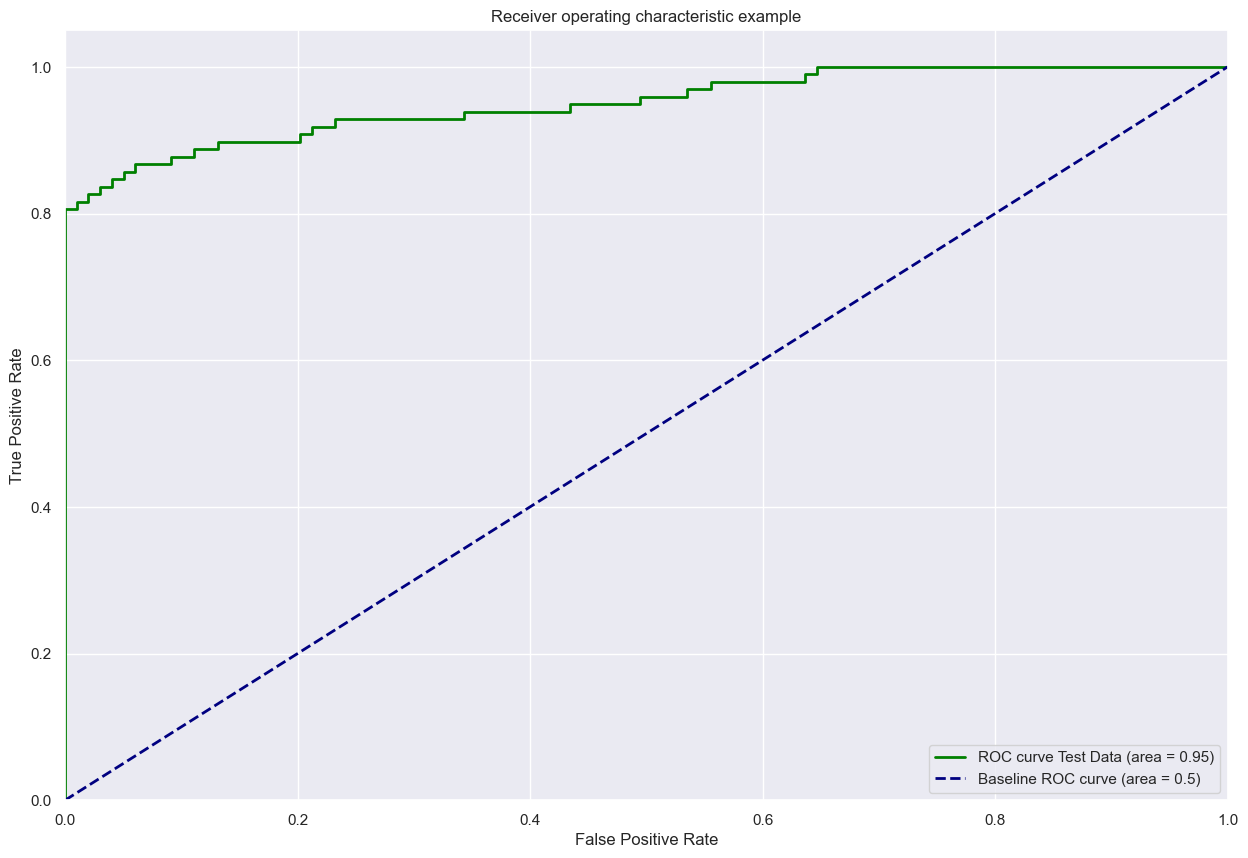

In [43]:
#Calibrate the model
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

knn

In [44]:
from sklearn.neighbors import KNeighborsClassifier

st=dt.now()

tuned_parameters = {'n_neighbors': [3,5,7,9,11,13,15],
                    'weights': ['uniform','distance'],
                    'algorithm': ['ball_tree','kd_tree','brute'] }

model = KNeighborsClassifier(n_jobs=-1, p=2, metric='minkowski')

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)

rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Time taken to complete random search:  0:00:00.220809


In [45]:
print_grid_search_attributes(rsearch_cv)

Best Estimator: 

	KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, weights='distance')

Best parameters: 
	Parameters of best estimator : 

	{'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'ball_tree'}

No of CrossValidation sets: 

	Total numbre of cross validation sets: 3

Best Score: 

	Average Cross Validate scores of best estimator : 

	0.701022888402703



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.002866


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.006275


F1 Score: 

    0.6598984771573604


Accuracy: 

    0.6598984771573604


Recall: 

    0.7142857142857143


ROC AUC: 

    0.7480931766646053


Classifiction Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        99
           1       0.64      0.71      0.68        98

    accuracy                           0.66       197
   macro avg       0.66      0.66      0.66       197
weighted avg       0.66      0.66      0.66       197



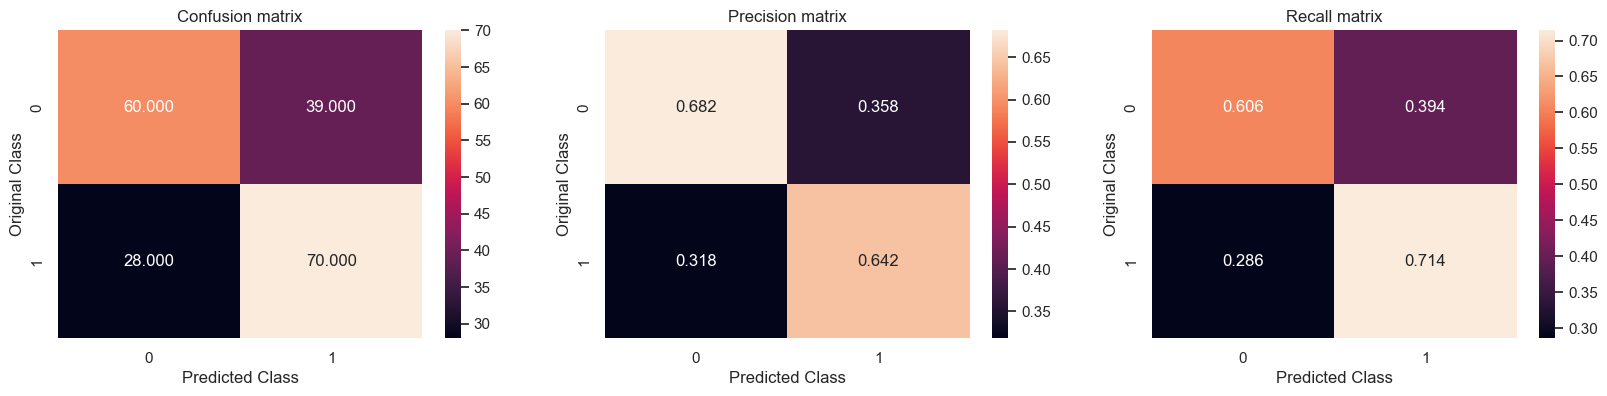

In [46]:
knn_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

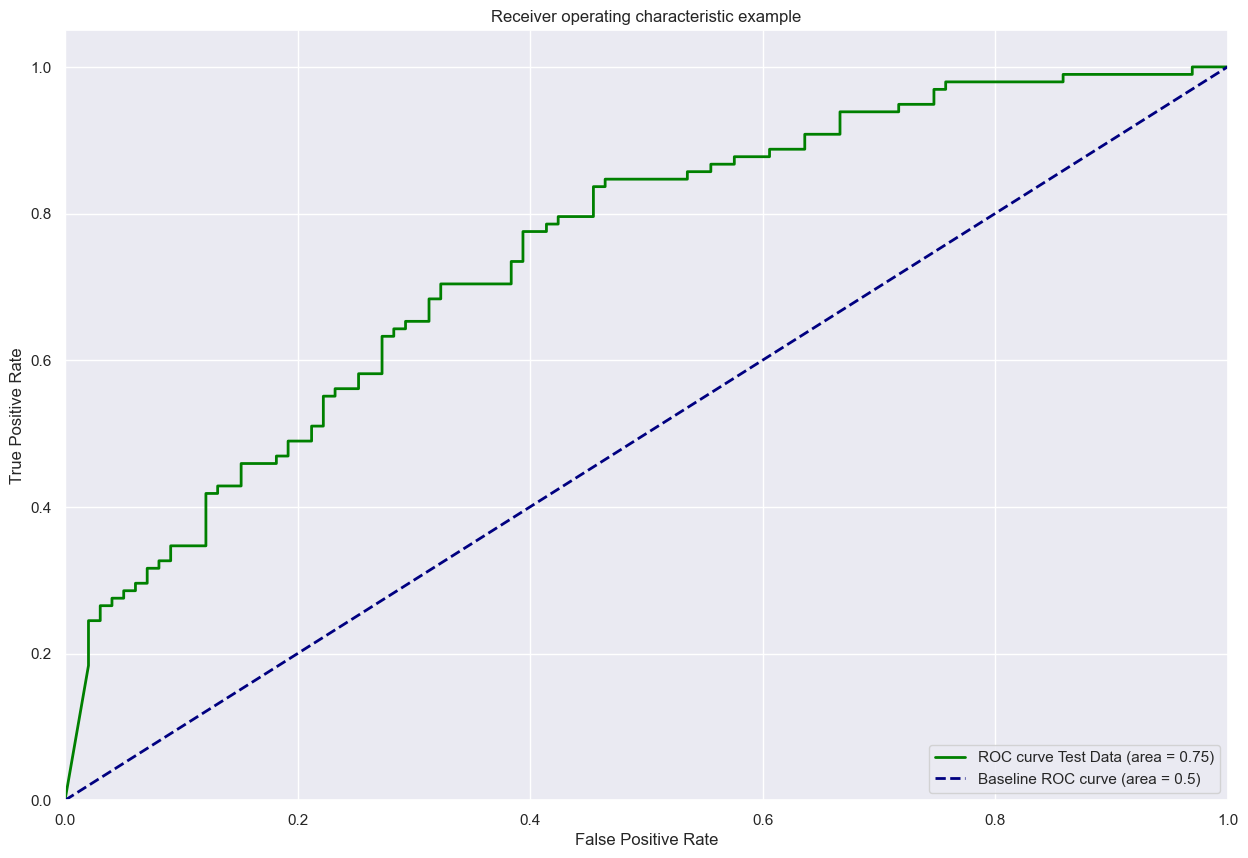

In [47]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

Decision Trees Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier


st=dt.now()

tuned_parameters = {'max_depth': np.arange(1,10,1),
                    'criterion': ['gini','entropy'],
                    'min_samples_split': np.arange(0.1,1.0,0.1),
                    'min_samples_leaf' : np.arange(1,10,1),
                    'min_weight_fraction_leaf' : [0.0,0.1,0.2,0.3,0.4],
                    'max_features': ['auto','sqrt','log2']} 

model = DecisionTreeClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)

rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Time taken to complete random search:  0:00:00.090979


In [49]:
print_grid_search_attributes(rsearch_cv)

Best Estimator: 

	DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=5,
                       min_samples_split=0.1, min_weight_fraction_leaf=0.1,
                       random_state=48)

Best parameters: 
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.1, 'min_samples_split': 0.1, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 3, 'criterion': 'gini'}

No of CrossValidation sets: 

	Total numbre of cross validation sets: 3

Best Score: 

	Average Cross Validate scores of best estimator : 

	0.94658018916512



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.004117


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.000506


F1 Score: 

    0.8832487309644669


Accuracy: 

    0.883248730964467


Recall: 

    0.7755102040816326


ROC AUC: 

    0.9009482580911152


Classifiction Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.89        99
           1       0.99      0.78      0.87        98

    accuracy                           0.88       197
   macro avg       0.90      0.88      0.88       197
weighted avg       0.90      0.88      0.88       197



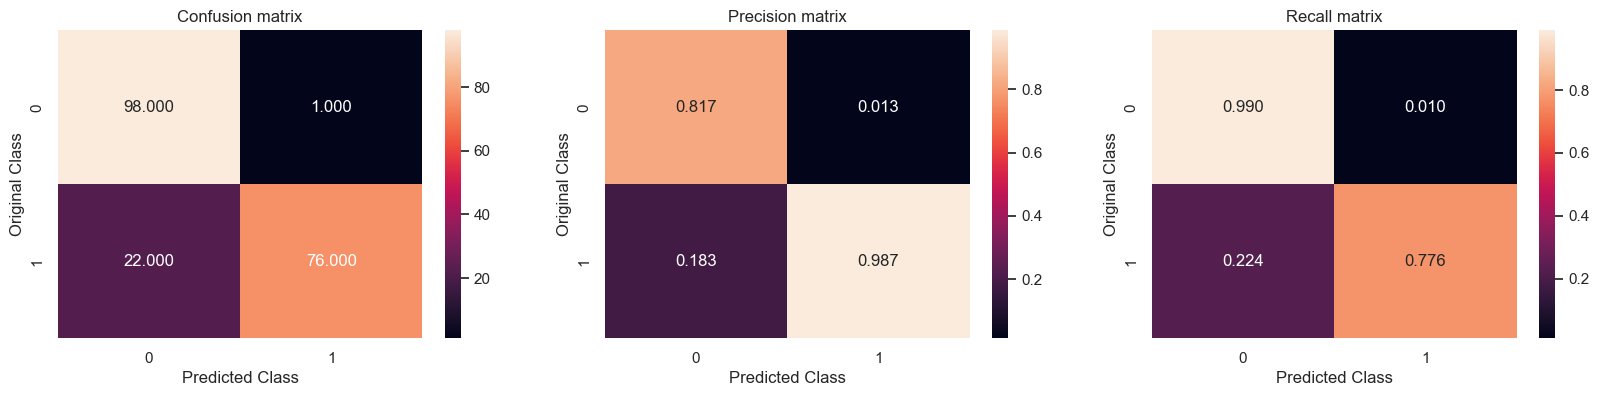

In [50]:
dt_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

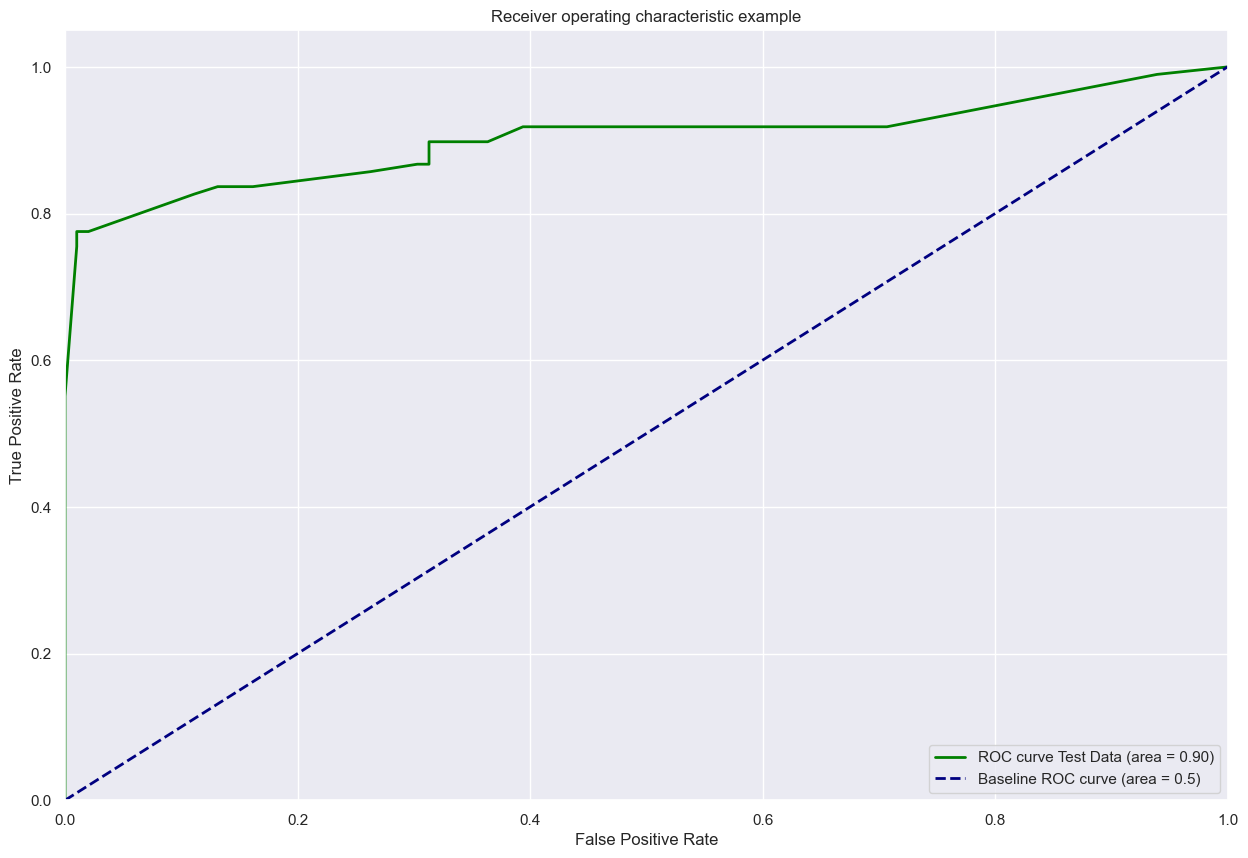

In [51]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)